In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

Data Processing

In [ ]:
# Load "train" data in pd df

df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/24S_ICS435_FPROJECT/data/AIDS_Classification.csv')

#One Hot Encode the categorical variables
#df_encoded = pd.get_dummies(df, columns=['trt', 'hemo', 'homo', 'drugs', 'oprior', 'z30', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt'])

#Setting aside 10% of the data
test_df = df.sample(frac=0.1, random_state=435)
train_val_df = df.drop(test_df.index)

#Remaining data: training and validation sets
X_train_val = train_val_df.drop('infected', axis=1)
y_train_val = train_val_df['infected']

X_test = test_df.drop('infected', axis=1)
y_test = test_df['infected']


Defining the NN and fitting model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout#, LeakyReLU
from tensorflow.keras.metrics import AUC
#from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=X_train_val.shape[1], activation='gelu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='gelu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='gelu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy', AUC(curve='ROC')])

# Train model
result = model.fit(X_train_val,
                   y_train_val,
                   epochs=50,
                   validation_split=0.2,
                   batch_size = 36,
                   verbose=2)

Epoch 1/50
43/43 - 2s - loss: 23.0752 - accuracy: 0.5429 - auc_12: 0.4876 - val_loss: 3.4212 - val_accuracy: 0.7481 - val_auc_12: 0.6166 - 2s/epoch - 56ms/step
Epoch 2/50
43/43 - 0s - loss: 7.7190 - accuracy: 0.5714 - auc_12: 0.4808 - val_loss: 1.4451 - val_accuracy: 0.7558 - val_auc_12: 0.6108 - 228ms/epoch - 5ms/step
Epoch 3/50
43/43 - 0s - loss: 3.8454 - accuracy: 0.6292 - auc_12: 0.5014 - val_loss: 0.9450 - val_accuracy: 0.7584 - val_auc_12: 0.6249 - 251ms/epoch - 6ms/step
Epoch 4/50
43/43 - 0s - loss: 2.0973 - accuracy: 0.6513 - auc_12: 0.5196 - val_loss: 0.7136 - val_accuracy: 0.7558 - val_auc_12: 0.5827 - 222ms/epoch - 5ms/step
Epoch 5/50
43/43 - 0s - loss: 1.5576 - accuracy: 0.6494 - auc_12: 0.4956 - val_loss: 0.6739 - val_accuracy: 0.7532 - val_auc_12: 0.5426 - 215ms/epoch - 5ms/step
Epoch 6/50
43/43 - 0s - loss: 1.4056 - accuracy: 0.6760 - auc_12: 0.4922 - val_loss: 0.6653 - val_accuracy: 0.7558 - val_auc_12: 0.5428 - 222ms/epoch - 5ms/step
Epoch 7/50
43/43 - 0s - loss: 1.198

Text(0.5, 0, 'Epoch')

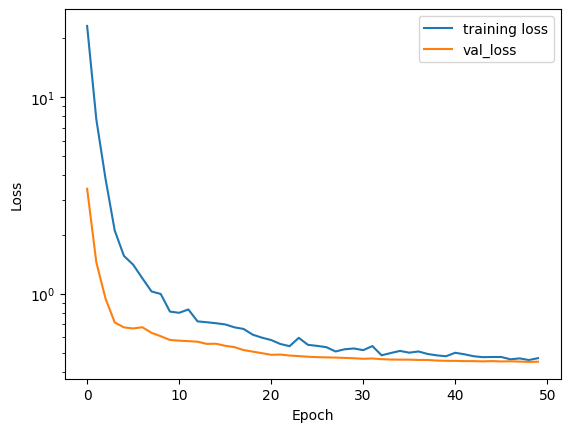

In [ ]:
#plot training and validation loss
plt.semilogy(result.history['loss'],label='training loss')
plt.semilogy(result.history['val_loss'],label='val_loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [ ]:
#make predictions on test data
y_prob = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


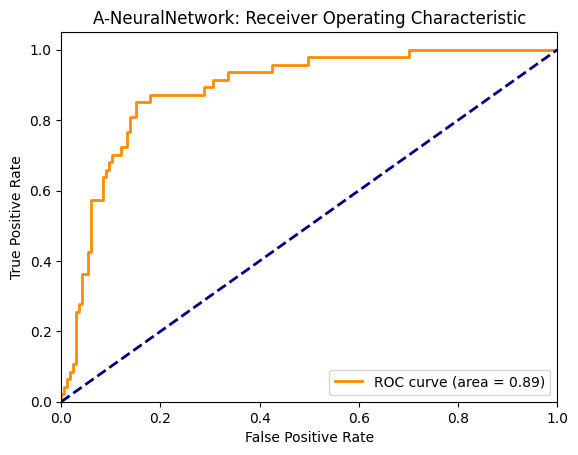

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('A-NeuralNetwork: Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import os

model_directory = './models'
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

from joblib import dump
# Define the path including the filename for the model
model_path = os.path.join(model_directory, 'NN_model.joblib')

# Save the model
dump(model, model_path)

['./models/NN_model.joblib']